# Adrian Kamiński
## Praca Domowa 5

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('clustering.csv', header = None)

In [3]:
data.describe()

,0,1
count,400.000000,400.000000
mean,-0.580656,-8.010264
std,48.821210,62.096845
min,-107.433649,-128.983720
25%,-34.551495,-70.730416
50%,5.691010,-3.447565
75%,31.456507,45.822610
max,109.733409,99.935839


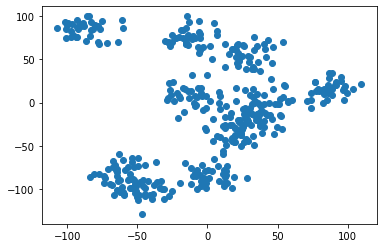

In [4]:
plt.scatter(data[0], data[1])
plt.show()

Dane są mniej więcej tej samej wielkości więc nie będę ich normalizował

In [5]:
def count_clustering_scores(X, cluster_num, model, score_fun):
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

### KMeans

Wybieramy liczbę klastrów korzystając z **indeksu Daviesa–Bouldina**.

Metryka ta wyznacza średnią odległość każdego klastra od klastra najbardziej podobnego, gdzie podobieństwo to, to stosunek *within-cluster distances* do *between-cluster distances*.

Im mniejsza wartość tym lepsze klastrowanie.

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

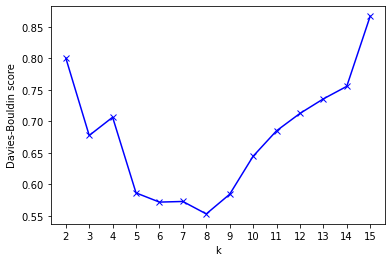

In [7]:
cluster_num_seq = range(2, 16)
fms_vec = count_clustering_scores(data, cluster_num_seq, KMeans, davies_bouldin_score)
plt.plot(cluster_num_seq, fms_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Davies-Bouldin score')
plt.xticks(cluster_num_seq)
plt.show()

Widzimy, że punktem który da najlepsze klastrowanie wydaje się być 8 (ew. 5).

In [8]:
def plot_kmeans_clusters(X, n_clusters):
    if isinstance(n_clusters, int) or len(n_clusters)==1:
        if isinstance(n_clusters, list):
            n_clusters = n_clusters[0]
        kmeans = KMeans(n_clusters=n_clusters, random_state=0)
        kmeans.fit(X)
        y_kmeans = kmeans.predict(X)
        plt.scatter(X[0], X[1], c=y_kmeans, s=30, cmap='viridis')

        plt.title('K-means clusters')
        plt.show()
    else:

        fig, axs = plt.subplots(1, len(n_clusters), sharey=True, figsize=(12,6))

        for i in range(len(n_clusters)):
            kmeans = KMeans(n_clusters=n_clusters[i], random_state=0)
            kmeans.fit(X)
            y_kmeans = kmeans.predict(X)
            axs[i].scatter(X[0], X[1], c=y_kmeans, s=30, cmap='viridis')
            axs[i].set_title('k=' + str(n_clusters[i]))

        fig.suptitle('K-means clusters', fontsize=16)
        plt.show()

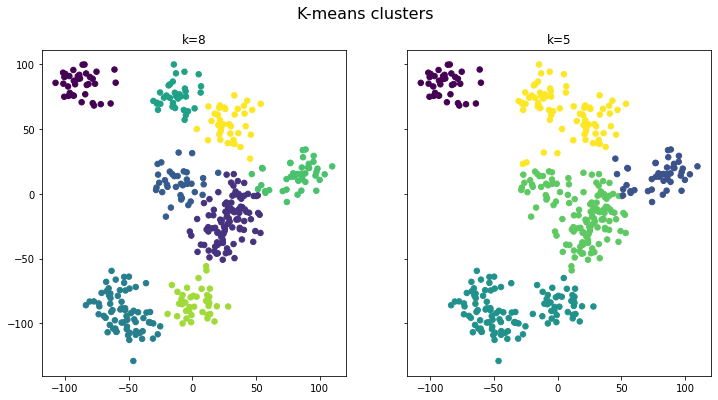

In [9]:
plot_kmeans_clusters(data, [8, 5])

### AgglomerativeClustering (linkage=complete)

Wybieramy liczbę klastrów korzystając z **indeksu Calińskiego-Harabasza**.

Metryka ta mierzy stostunek między *within-cluster dispersion* a *between-cluster dispersion*.

Tym razem im większa wartość tym lepsza klasteryzacja.

In [10]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score

In [11]:
from functools import partial

In [12]:
clustering_func = partial(AgglomerativeClustering, linkage='complete')

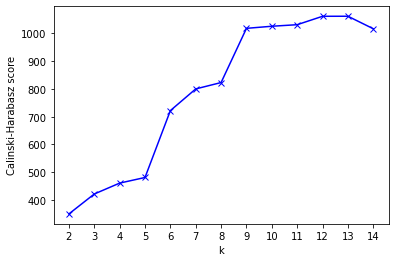

In [13]:
cluster_num_seq = range(2, 15)
fms_vec = count_clustering_scores(data, cluster_num_seq, clustering_func, calinski_harabasz_score)
plt.plot(cluster_num_seq, fms_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Calinski-Harabasz score')
plt.xticks(cluster_num_seq)
plt.show()

Widzimy, że punktem który da najlepsze klastrowanie wydaje się być 9 (ew. 6).

In [14]:
def plot_agglomerative_clustering(X, n_clusters):
    if isinstance(n_clusters, int) or len(n_clusters)==1:
        if isinstance(n_clusters, list):
            n_clusters = n_clusters[0]
        model = clustering_func(n_clusters=n_clusters)
        y = model.fit_predict(X)
        plt.scatter(X[0], X[1], c=y, s=30, cmap='viridis')
        plt.title(f'Clusters from agglomerative_clustering with complete linkage')
        plt.show()
        
    else:
        
        fig, axs = plt.subplots(1,len(n_clusters), sharey=True, figsize=(12,6))

        for i in range(len(n_clusters)):

            model = clustering_func(n_clusters=n_clusters[i])
            y = model.fit_predict(X)
            axs[i].scatter(X[0], X[1], c=y, s=30, cmap='viridis')
            axs[i].set_title("k="+str(n_clusters[i]))
        fig.suptitle(f'Clusters from agglomerative_clustering with complete linkage', fontsize=16)
        plt.show()

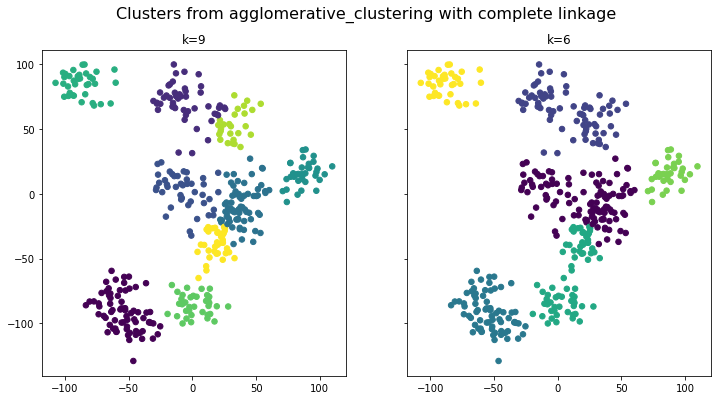

In [15]:
plot_agglomerative_clustering(data, [9, 6])

Widzmy, inną liczbę optymalnych klastrów gdy stostujemy inną metrykę i inną metodę.